In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/states.csv')
df.head()

,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016)
0,Alabama,14.6%,10.1%,-4.5%,215000,2545000,165534,152206,$310,False,799176.0,910775,111599.0,989855
1,Alaska,19.9%,14.9%,-5%,36000,390000,17995,16205,$750,True,122334.0,166625,44291.0,88966
2,Arizona,16.9%,10.8%,-6.1%,410000,3288000,179445,124346,$230,True,1201770.0,1716198,514428.0,1175624
3,Arkansas,17.5%,9.5%,-8%,234000,1365000,63357,56843,$306,True,556851.0,920194,363343.0,606146
4,California,18.5%,8.6%,-9.9%,3826000,19552000,1415428,1239893,$309,True,7755381.0,11843081,4087700.0,5829777


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 15 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   State                                         51 non-null     object 
 1   Uninsured Rate (2010)                         51 non-null     float64
 2   Uninsured Rate (2015)                         51 non-null     float64
 3   Uninsured Rate Change (2010-2015)             51 non-null     float64
 4   Health Insurance Coverage Change (2010-2015)  51 non-null     int64  
 5   Employer Health Insurance Coverage (2015)     51 non-null     int64  
 6   Marketplace Health Insurance Coverage (2016)  51 non-null     int64  
 7   Marketplace Tax Credits (2016)                51 non-null     int64  
 8   Average Monthly Tax Credit (2016)             51 non-null     float64
 9   State Medicaid Expansion (2016)               51 non-null     objec

In [4]:
df.describe()

,Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016)
count,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.000000e+01,5.200000e+01,5.000000e+01,5.200000e+01
mean,7.479423e+05,6.626615e+06,4.262050e+05,3.611388e+05,2.255699e+06,2.828190e+06,6.442463e+05,2.173923e+06
std,2.691466e+06,2.370240e+07,1.538234e+06,1.306590e+06,7.945644e+06,1.017933e+07,2.306655e+06,7.855834e+06
min,1.500000e+04,3.350000e+05,1.331300e+04,1.224000e+03,6.751800e+04,6.358300e+04,-3.935000e+03,8.896600e+04
25%,9.725000e+04,8.797500e+05,5.109700e+04,4.371700e+04,2.897750e+05,3.091128e+05,5.397900e+04,3.208870e+05
50%,2.245000e+05,2.305500e+06,1.306725e+05,9.817550e+04,7.946135e+05,9.780525e+05,2.341560e+05,8.187530e+05
75%,4.122500e+05,4.386500e+06,2.260822e+05,1.936845e+05,1.274017e+06,1.732724e+06,4.562492e+05,1.298255e+06
max,1.930400e+07,1.722920e+08,1.108133e+07,9.389609e+06,5.639248e+07,7.353293e+07,1.610616e+07,5.714998e+07


In [5]:
# converting the numerical columns to type float from object

df['Uninsured Rate Change (2010-2015)'] = df['Uninsured Rate Change (2010-2015)'].astype(str)
df['Uninsured Rate Change (2010-2015)'] = df['Uninsured Rate Change (2010-2015)'].str.strip().str.rstrip('%').astype(float)

df['Uninsured Rate (2010)'] = df['Uninsured Rate (2010)'].astype(str)
df['Uninsured Rate (2010)'] = df['Uninsured Rate (2010)'].str.strip().str.rstrip('%').astype(float)

df['Uninsured Rate (2015)'] = df['Uninsured Rate (2015)'].astype(str)
df['Uninsured Rate (2015)'] = df['Uninsured Rate (2015)'].str.strip().str.rstrip('%').astype(float)

df['Average Monthly Tax Credit (2016)'] = df['Average Monthly Tax Credit (2016)'].astype(str)
df['Average Monthly Tax Credit (2016)'] = df['Average Monthly Tax Credit (2016)'].str.strip().str.lstrip('$').astype(float)

In [6]:
df['Medicaid Enrollment (2013)'].fillna(df['Medicaid Enrollment (2013)'].median(), inplace=True)
df['Medicaid Enrollment Change (2013-2016)'].fillna(df['Medicaid Enrollment Change (2013-2016)'].median(), inplace=True)

In [7]:
df.isna().sum()


State                                           0
Uninsured Rate (2010)                           0
Uninsured Rate (2015)                           0
Uninsured Rate Change (2010-2015)               0
Health Insurance Coverage Change (2010-2015)    0
Employer Health Insurance Coverage (2015)       0
Marketplace Health Insurance Coverage (2016)    0
Marketplace Tax Credits (2016)                  0
Average Monthly Tax Credit (2016)               0
State Medicaid Expansion (2016)                 1
Medicaid Enrollment (2013)                      0
Medicaid Enrollment (2016)                      0
Medicaid Enrollment Change (2013-2016)          0
Medicare Enrollment (2016)                      0
dtype: int64

In [8]:
df.describe()


,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016)
count,52.000000,52.000000,52.000000,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,52.000000,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01
mean,14.180769,8.734615,-5.211538,7.479423e+05,6.626615e+06,4.262050e+05,3.611388e+05,292.134615,2.199503e+06,2.828190e+06,6.284736e+05,2.173923e+06
std,4.164087,3.142678,2.649429,2.691466e+06,2.370240e+07,1.538234e+06,1.306590e+06,85.153386,7.793455e+06,1.017933e+07,2.262376e+06,7.855834e+06
min,4.400000,2.800000,-10.300000,1.500000e+04,3.350000e+05,1.331300e+04,1.224000e+03,178.000000,6.751800e+04,6.358300e+04,-3.935000e+03,8.896600e+04
25%,11.250000,6.250000,-6.600000,9.725000e+04,8.797500e+05,5.109700e+04,4.371700e+04,249.500000,2.926110e+05,3.091128e+05,5.516300e+04,3.208870e+05
50%,14.300000,8.650000,-4.900000,2.245000e+05,2.305500e+06,1.306725e+05,9.817550e+04,291.000000,7.946135e+05,9.780525e+05,2.341560e+05,8.187530e+05
75%,17.350000,10.900000,-3.875000,4.122500e+05,4.386500e+06,2.260822e+05,1.936845e+05,310.500000,1.254350e+06,1.732724e+06,4.160878e+05,1.298255e+06
max,23.700000,17.100000,6.100000,1.930400e+07,1.722920e+08,1.108133e+07,9.389609e+06,750.000000,5.639248e+07,7.353293e+07,1.610616e+07,5.714998e+07


In [9]:
df = df.drop(51, axis=0)

<h3>Calculating Top KPI Metrics</h3>

In [10]:
# Total Uninsured Rate Change (2010-2015)
total_uninsured_rate_change_2010_2016 = df['Uninsured Rate Change (2010-2015)'].sum()

# Average Monthly Tax Credit (2016)
average_monthly_tax_credit_2016 = df['Average Monthly Tax Credit (2016)'].mean()

# Total Health Insurance Coverage Change (2010-2015)
total_health_ins_coverage_change_2010_2015 = df['Health Insurance Coverage Change (2010-2015)'].sum()/ 1_000_000 

# Total Employer Health Insurance Coverage (2015)
total_employer_health_ins_coverage_2015 = df['Employer Health Insurance Coverage (2015)'].sum()/ 1_000_000 

# Total Marketplace Health Insurance Coverage (2016)
total_marketplace_health_ins_coverage_2016 = df['Marketplace Health Insurance Coverage (2016)'].sum()/ 1_000_000 

# Total Marketplace Tax Credit
total_marketplace_tax_credit = df['Marketplace Tax Credits (2016)'].sum()/ 1_000_000 

# Total Medicaid Enrollment (2016)
total_medicaid_enrollment_2016 = df['Medicaid Enrollment (2016)'].sum()/ 1_000_000 

# Total Medicare Enrollment (2016)
total_medicare_enrollment_2016 = df['Medicare Enrollment (2016)'].sum()/ 1_000_000 

# Print the results
print("Total Uninsured Rate Change (2010-2016):", total_uninsured_rate_change_2010_2016)
print("Average Monthly Tax Credit (2016):", average_monthly_tax_credit_2016)
print(f"Total Health Insurance Coverage Change (2010-2015): {total_health_ins_coverage_change_2010_2015:.2f}M")
print(f"Total Employer Health Insurance Coverage (2015):{total_employer_health_ins_coverage_2015:.2f}M")
print(f"Total Marketplace Health Insurance Coverage (2016):{total_marketplace_health_ins_coverage_2016:.2f}M")
print(f"Total Marketplace Tax Credit:{total_marketplace_tax_credit:.2f}M")
print(f"Total Medicaid Enrollment (2016):{total_medicaid_enrollment_2016:.2f}M")
print(f"Total Medicare Enrollment (2016):{total_medicare_enrollment_2016:.2f}M")


Total Uninsured Rate Change (2010-2016): -277.09999999999997
Average Monthly Tax Credit (2016): 292.15686274509807
Total Health Insurance Coverage Change (2010-2015): 19.59M
Total Employer Health Insurance Coverage (2015):172.29M
Total Marketplace Health Insurance Coverage (2016):11.08M
Total Marketplace Tax Credit:9.39M
Total Medicaid Enrollment (2016):73.53M
Total Medicare Enrollment (2016):55.89M


<h3>The top 12 states with the most declined uninsured rate change from 2010 to 2016:</h3>

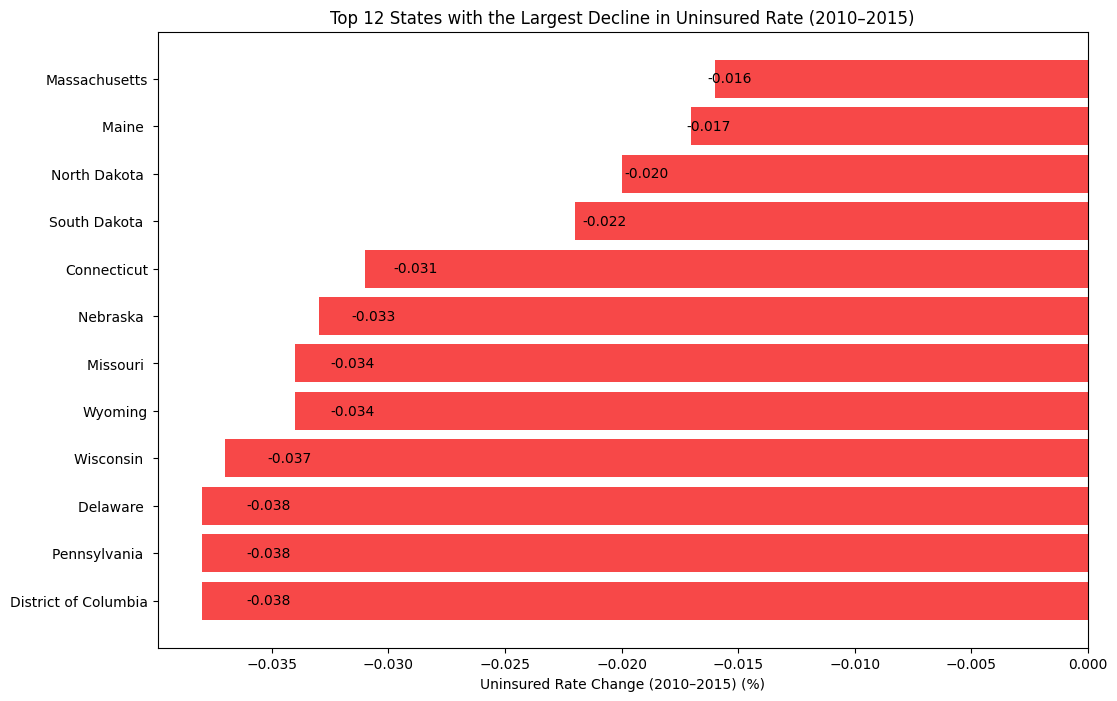

In [11]:
# Create a new column as a percentage
df['Uninsured Rate Change (2010-2015) %'] = df['Uninsured Rate Change (2010-2015)'] / 100

# Sort and select top 12 states with the largest decline (most negative change)
top12_decline_uninsured = df.sort_values(
    by='Uninsured Rate Change (2010-2015) %', ascending=False  # ascending=False → most decline (negative)
).head(12)

# Plot
plt.figure(figsize=(12, 8))
bars = plt.barh(
    top12_decline_uninsured['State'],
    top12_decline_uninsured['Uninsured Rate Change (2010-2015) %'],
    color="#f73a3aed"
)

plt.xlabel('Uninsured Rate Change (2010–2015) (%)')
plt.title('Top 12 States with the Largest Decline in Uninsured Rate (2010–2015)')
plt.gca().invert_yaxis()  # largest decline at top

for bar in bars:
    width = bar.get_width()
    plt.text(   
        width - (0.1 * width),           
        bar.get_y() + bar.get_height() / 2,  
        f'{width:.3f}',                       
        va='center',
        ha='right'                        
    )

plt.show()

<h3>States Medicaid Expansion (2016) Enrollment Status:</h3>

In [12]:
df['State Medicaid Expansion (2016)'].value_counts()


State Medicaid Expansion (2016)
True     32
False    19
Name: count, dtype: int64

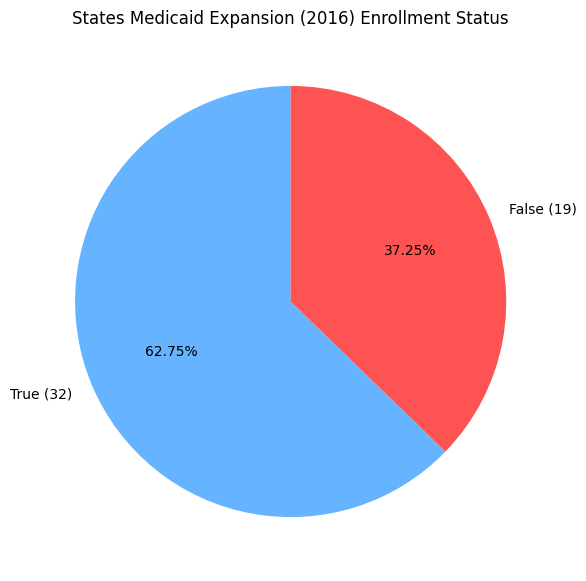

In [13]:
expansion_counts = df['State Medicaid Expansion (2016)'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(
    expansion_counts,
    labels=[f'{label} ({count})' for label, count in zip(expansion_counts.index, expansion_counts)],
    autopct='%1.2f%%',
    startangle=90,
    colors=['#66b3ff',"#fe5353"]
)
plt.title('States Medicaid Expansion (2016) Enrollment Status')
plt.show()


<h2>Top 10 States With The Most Significant Medicaid Enrollment Change (2013-2016):</h2>

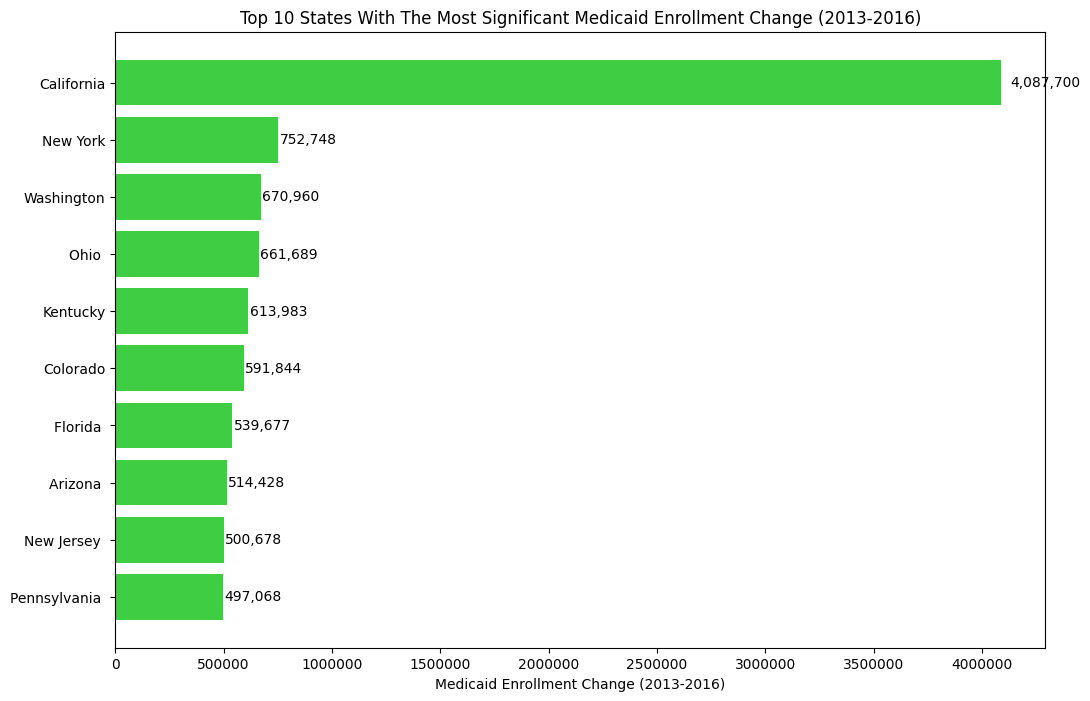

In [14]:
# Sort the dataframe by 'Medicaid Enrollment Change (2013-2016)' in descending order
top10_states = df.sort_values(
    by='Medicaid Enrollment Change (2013-2016)', 
    ascending=False
).head(10)

# Plot
plt.figure(figsize=(12, 8))
bars = plt.barh(
    top10_states['State'],
    top10_states['Medicaid Enrollment Change (2013-2016)'],
    color="#3fcd43"
)

plt.xlabel('Medicaid Enrollment Change (2013-2016)')
plt.title('Top 10 States With The Most Significant Medicaid Enrollment Change (2013-2016)')
plt.ticklabel_format(style='plain', axis='x')
plt.gca().invert_yaxis() 

for bar in bars:
    width = bar.get_width()
    plt.text(
        width + (0.01 * width),               # x-position: a bit to the right of the bar
        bar.get_y() + bar.get_height() / 2,   # y-position: vertically centered
        f'{int(width):,}',                    # formatted with commas
        va='center'
    )

plt.show()

<h2>Top 10 States By Health Insurance Coverage Change (2010-2015):</h2>

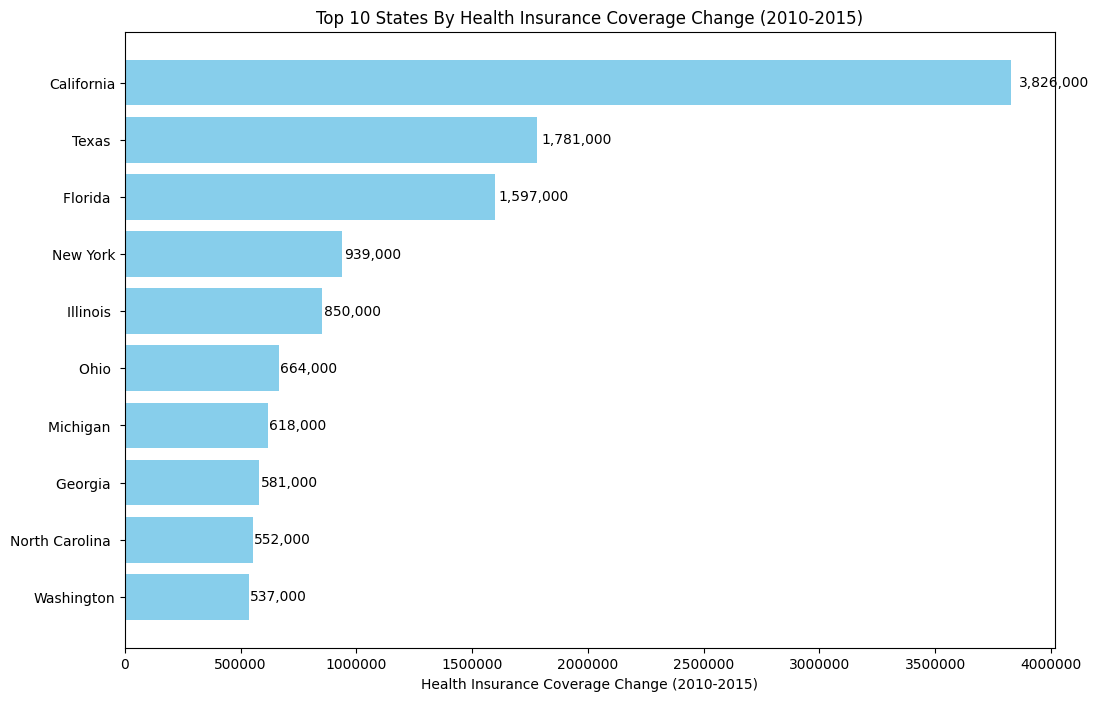

In [15]:

# Sort the dataframe by 'Medicaid Enrollment Change (2013-2016)' in descending order
top10_states = df.sort_values(
    by='Health Insurance Coverage Change (2010-2015)', 
    ascending=False
).head(10)

# Plot
plt.figure(figsize=(12, 8))
bars = plt.barh(
    top10_states['State'],
    top10_states['Health Insurance Coverage Change (2010-2015)'],
    color='skyblue'
)

plt.xlabel('Health Insurance Coverage Change (2010-2015)')
plt.title('Top 10 States By Health Insurance Coverage Change (2010-2015)')
plt.ticklabel_format(style='plain', axis='x')
plt.gca().invert_yaxis() 

for bar in bars:
    width = bar.get_width()
    plt.text(
        width + (0.01 * width),               # x-position: a bit to the right of the bar
        bar.get_y() + bar.get_height() / 2,   # y-position: vertically centered
        f'{int(width):,}',                    # formatted with commas
        va='center'
    )

plt.show()

<h2>Top 10 States With Most Average Monthly Tax Credits (2016):</h2>

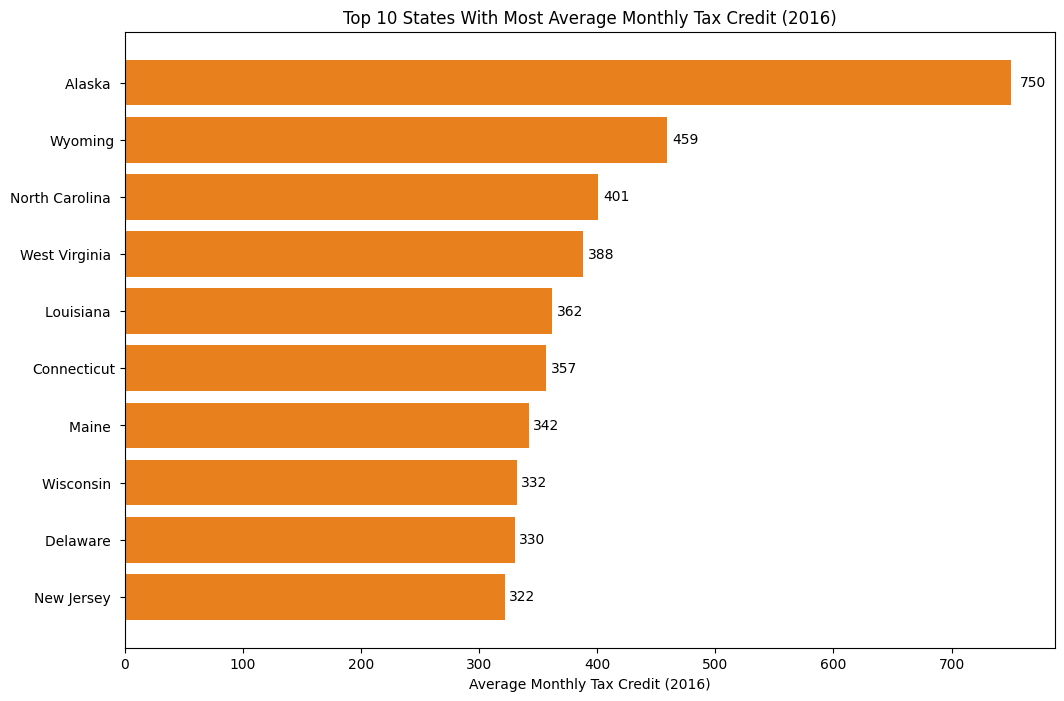

In [16]:

# Sort the dataframe by 'Medicaid Enrollment Change (2013-2016)' in descending order
top10_states = df.sort_values(
    by='Average Monthly Tax Credit (2016)', 
    ascending=False
).head(10)

# Plot
plt.figure(figsize=(12, 8))
bars = plt.barh(
    top10_states['State'],
    top10_states['Average Monthly Tax Credit (2016)'],
    color="#e9801e"
)

plt.xlabel('Average Monthly Tax Credit (2016)')
plt.title('Top 10 States With Most Average Monthly Tax Credit (2016)')
plt.ticklabel_format(style='plain', axis='x')
plt.gca().invert_yaxis() 

for bar in bars:
    width = bar.get_width()
    plt.text(
        width + (0.01 * width),               # x-position: a bit to the right of the bar
        bar.get_y() + bar.get_height() / 2,   # y-position: vertically centered
        f'{int(width):,}',                    # formatted with commas
        va='center'
    )

plt.show()

<h2>Top 10 States By Marketplace Tax Credits (2016):</h2>

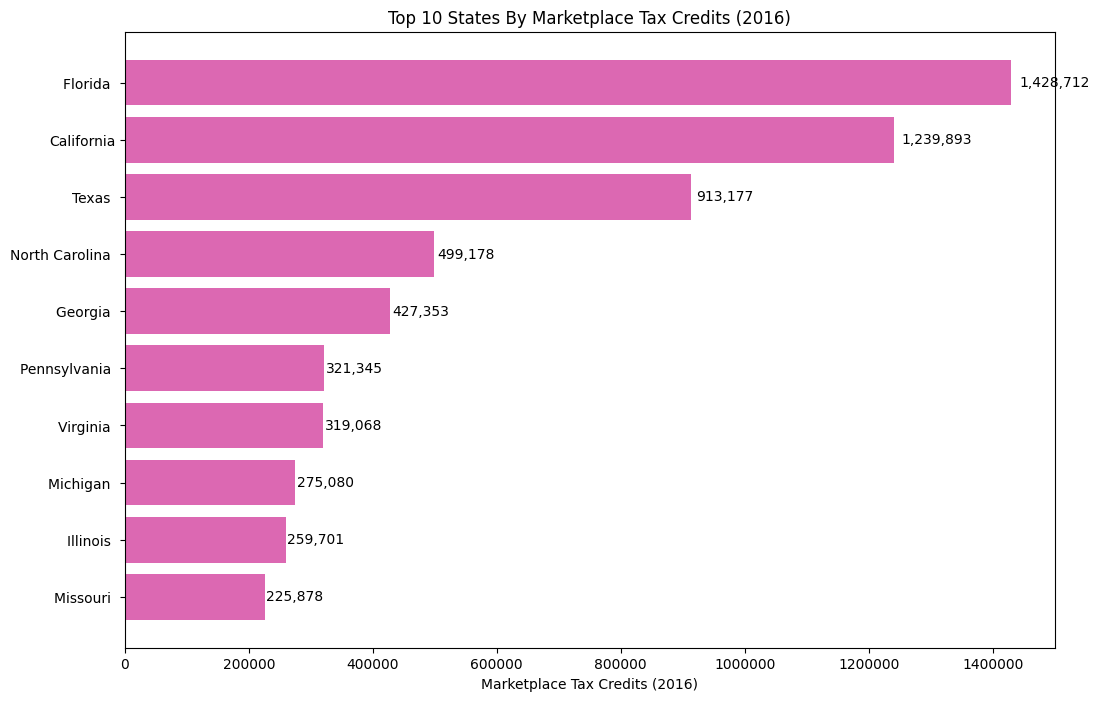

In [17]:

# Sort the dataframe by 'Medicaid Enrollment Change (2013-2016)' in descending order
top10_states = df.sort_values(
    by='Marketplace Tax Credits (2016)', 
    ascending=False
).head(10)

# Plot
plt.figure(figsize=(12, 8))
bars = plt.barh(
    top10_states['State'],
    top10_states['Marketplace Tax Credits (2016)'],
    color="#d23d9cc6"
)

plt.xlabel('Marketplace Tax Credits (2016)')
plt.title('Top 10 States By Marketplace Tax Credits (2016)')
plt.ticklabel_format(style='plain', axis='x')
plt.gca().invert_yaxis() 

for bar in bars:
    width = bar.get_width()
    plt.text(
        width + (0.01 * width),               # x-position: a bit to the right of the bar
        bar.get_y() + bar.get_height() / 2,   # y-position: vertically centered
        f'{int(width):,}',                    # formatted with commas
        va='center'
    )

plt.show()

<h2>Top 10 States By Employer Health Insurance Coverage (2015), Marketplace Health Insurance Coverage (2016), Medicaid Enrollment (2016), and Medicare Enrollment (2016):</h2>

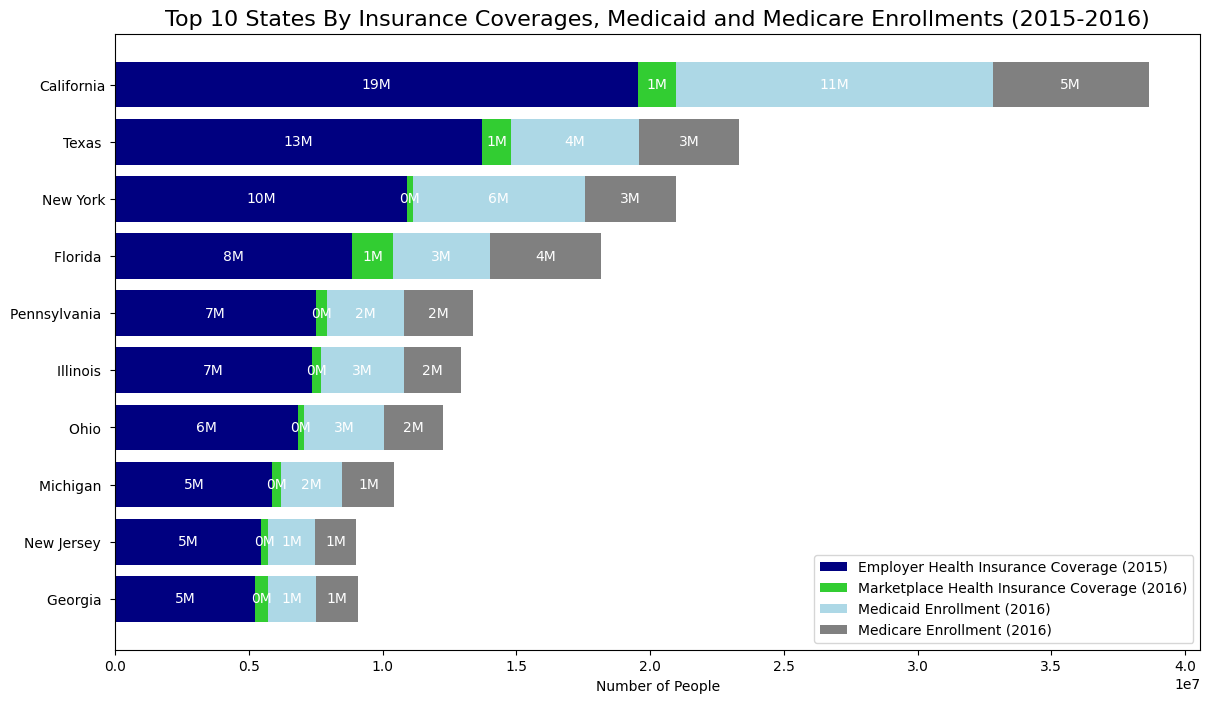

In [ ]:
# Pick top 10 states by Employer Health Insurance Coverage
top10 = df.sort_values(by='Employer Health Insurance Coverage (2015)', ascending=False).head(10)
top10 = top10.set_index('State')  # set state as index

# Metrics to stack
metrics = [
    'Employer Health Insurance Coverage (2015)',
    'Marketplace Health Insurance Coverage (2016)',
    'Medicaid Enrollment (2016)',
    'Medicare Enrollment (2016)'
]

# Colors for each segment
colors = ['navy', 'limegreen', 'lightblue', 'gray']

# Plot stacked horizontal bars
fig, ax = plt.subplots(figsize=(14,8))

bottom = [0]*len(top10)
for i, metric in enumerate(metrics):
    ax.barh(top10.index, top10[metric], left=bottom, color=colors[i], label=metric)
    # Add value labels
    for j, val in enumerate(top10[metric]):
        if val > 0:  # only label if value > 0
            ax.text(bottom[j] + val/2, j, f'{int(val/1_000_000)}M', ha='center', va='center', color='white', fontsize=10)
    # Update bottom for next stack
    bottom = [bottom[k] + top10[metric].iloc[k] for k in range(len(bottom))]

ax.set_title("Top 10 States By Insurance Coverages, Medicaid and Medicare Enrollments (2015-2016)", fontsize=16)
ax.set_xlabel("Number of People")
ax.legend()
plt.gca().invert_yaxis()  # largest at top
plt.show()


<h2>Uninsured Rate Change By States (2010-2015):</h2>

In [ ]:
state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
    'District of Columbia': 'DC', 'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI',
    'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV',
    'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# remove trailing spaces
df['States_clean'] = df['State'].str.strip()

# Map to abbreviations
df['State_abbrev'] = df['States_clean'].map(state_abbrev)

print(df['State_abbrev'].unique())

['AL' 'AK' 'AZ' 'AR' 'CA' 'CO' 'CT' 'DE' 'DC' 'FL' 'GA' 'HI' 'ID' 'IL'
 'IN' 'IA' 'KS' 'KY' 'LA' 'ME' 'MD' 'MA' 'MI' 'MN' 'MS' 'MO' 'MT' 'NE'
 'NV' 'NH' 'NJ' 'NM' 'NY' 'NC' 'ND' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD'
 'TN' 'TX' 'UT' 'VT' 'VA' 'WA' 'WV' 'WI' 'WY']


In [ ]:
# Base choropleth
fig = px.choropleth(
    df,
    locations='State_abbrev',
    locationmode='USA-states',
    color='Uninsured Rate Change (2010-2015)',
    color_continuous_scale='RdYlGn_r',
    scope='usa',
    labels={'Uninsured Rate Change (2010-2015)': 'Uninsured Rate Change'},
    title='Uninsured Rate Change By States (2010-2015)'
)

# Add text labels using scattergeo
for i, row in df.iterrows():
    fig.add_trace(
        go.Scattergeo(
            locationmode='USA-states',
            locations=[row['State_abbrev']],
            text=f"{row['State_abbrev']}: {row['Uninsured Rate Change (2010-2015)']}",
            mode='text',
            showlegend=False
        )
    )

fig.show()
